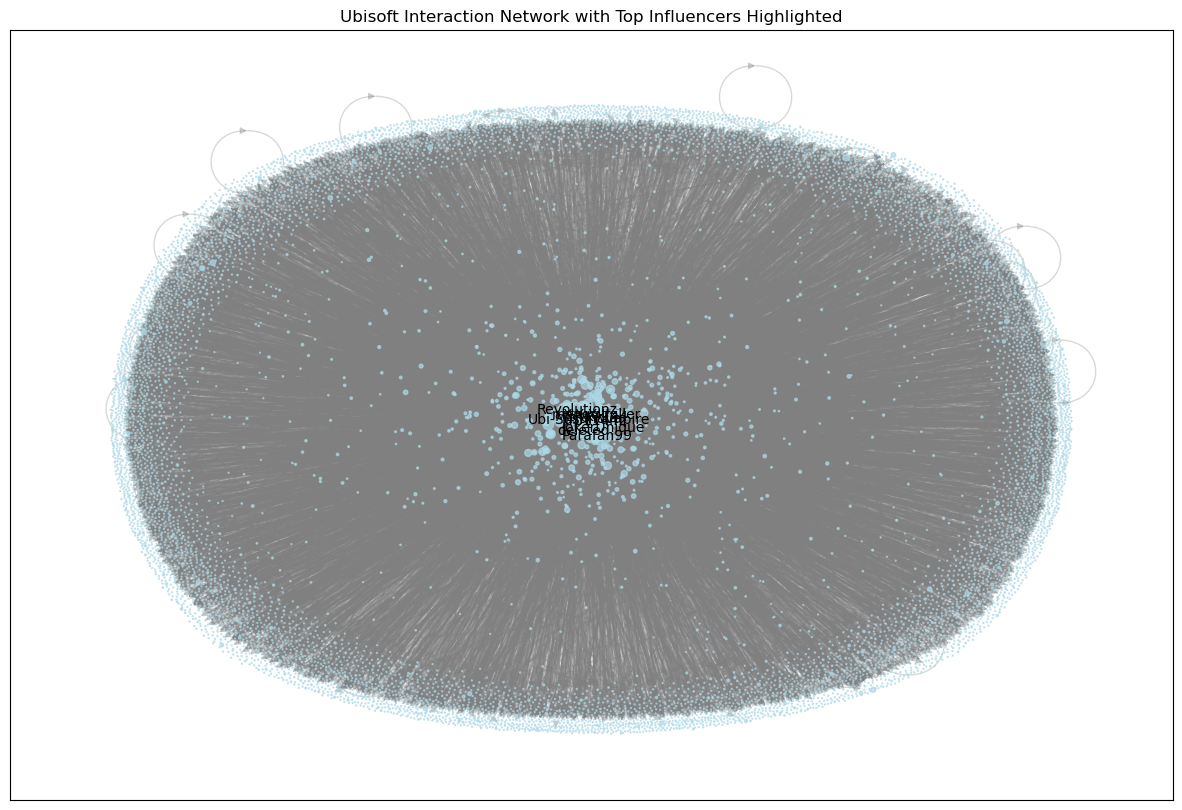

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

file_path = '/Users/sriyan/Documents/is434-ubisoft/data-collection/reddit/data scraping/data/network_analysis/reddit_external_ubisoft_network_interactions.csv' 
data = pd.read_csv(file_path)

# Create a directed graph
G = nx.from_pandas_edgelist(data, source='Source', target='Target', edge_attr='Weight', create_using=nx.DiGraph())

# Calculate degree centrality for node size visualization
degree_centrality = nx.degree_centrality(G)
node_size = [5000 * degree_centrality[node] for node in G.nodes()]

# Visualize the graph with key influencers labeled
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, seed=42)  # Layout for positioning
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='lightblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='gray')
nx.draw_networkx_labels(
    G, pos, 
    labels={node: node for node in sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]}, 
    font_size=10, font_color='black'
)
plt.title("Ubisoft Interaction Network with Top Influencers Highlighted")
plt.show()


In [2]:
from networkx.algorithms import community

# Use the Girvan-Newman algorithm as an example of community detection
communities = community.girvan_newman(G)
top_level_communities = next(communities)
sorted_communities = sorted(map(sorted, top_level_communities))

# Print number of detected communities
num_communities = len(sorted_communities)
print(f"Number of Communities: {num_communities}")

# Display a few example communities (you can customize this as needed)
print("Example Communities (first 3):")
for i, community_group in enumerate(sorted_communities[:3]):
    print(f"Community {i+1}: {community_group}")


Number of Communities: 196
Example Communities (first 3):
Community 1: ['---InFamous---', '--Circle--', '-Aone', '-Binxx-', '-BlackPaisley-', '-Broccoli_', '-Crawler6174', '-FalconKick-', '-Galahad-', '-Gonk', '-Jdzspace-', '-Pale-Rider-', '-Pwnan-', '-Radagon-', '-Raelana-', '-SidSilver-', '-Sloth_King-', '-StupidNameHere-', '-TAAC-Slow', '-Th3Saints-', '-TheCabbageMerchant-', '-TheMiracle', '-_Moondance_-', '-e0le-', '-kraw-', '-psilocybin', '0002nam-ytlaS', '0235', '0V3Royale', '0akhurst', '0vbbCa', '0zer0space0', '100roundglock', '10minOfNamingMyAcc', '12Eerc', '13-Dancing-Shadows', '13lackcrest', '13thcow', '1440pSupportPS5', '1600x1600', '1718384929167484939', '1987InfamousQ7891', '1GsW', '1Tesseract1', '1hate2choose4nick', '1ndigoch1ld', '1turbulentflow', '22taylor22', '2Bbannedagain', '2cruz101', '2hats4bats', '2o2i', '2roK', '3--turbulentdiarrhea', '32768Colours', '33beno33', '354510', '35antonio', '360walkaway', '39strangers', '3MaNhUnT3', '3P1CToENaiL', '3pileptic', '4000kd'

In [3]:
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Get the top 5 nodes by betweenness centrality (indicative of influence)
top_influencers = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Influencers (Betweenness Centrality):")
for user, centrality in top_influencers:
    print(f"{user}: {centrality:.4f}")


Top 5 Influencers (Betweenness Centrality):
Raidenski: 0.0001
Shadowsnake30: 0.0001
PixelSaharix: 0.0001
qwettry: 0.0001
GnarlyAtol: 0.0000
